## **Introduction**

Wine is one of the most popular alcoholic beverages in the world, with a great range between the cheapest and the most expensive wines. The project’s main objective is to determine which chemical characteristics determine wine quality to predict the quality of a new sample. Question: What characteristics best determine the quality of wine and how accurate is the model to predict wine quality? Answering this question would assist both customers and sellers to more accurately price wine bottles based on their “Intrinsic Quality” levels, while it would allow customers to purchase quality wine at the lowest possible cost. The dataset we are using for the project consists information about chemical composition of each wine as well as information about that wine’s quality. The dataset was created and maintained by M Yasser H and the method for collection of data is google research. The dataset contains 1598 observations, 11 quantitative variables, and 1 categorical variable. The variables include density, pH values, sugar level, and other quantitative variables. The categorical variable that we are using is “quality”, which is represented on the scale from 0 to 10, where the min value observed is 3 and the max value observed is 8. The initial model is based on the report made by Nimit Dhalia, “The Effect of Physicochemical on The Wine Quality,” which states that red wine quality tends to depend on volatile acidity, alcohol, total sulfur dioxide, and sulphites whereas white wine quality depends on density rather than sulphites. Since the dataset does not show whether the wine is white or red, variables from both categories will be used in the initial model.

### *Objective*
1. To figure out which Variables have strong correlations with Wine Quality
    1. Compare to the Initial Hypothesis that Wine Quality depends on 
        - Volatile Acidity
        - Alcohol Level
        - Total Sulful Dioxide
        - Sulphites Level
2. Run Classification and Regression Analysis on the Dataset
    1. Determine the best accuracy of the model
3. Discuss the analysis and propose future implications



In [15]:
#attach packages
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [61]:
dataset <- read_csv("https://drive.google.com/uc?export=download&id=1m1oh8R2D0EGajeNJdoHUu-jHjQy3w_3e")
#renames the columns and gets rid of the spaces
colnames(dataset)<- c('fix_acid','vol_acid','citric_acid','resid_sugar',
                      'chlorides','free_sugar_dioxide','total_sulfur_dioxide','density',
                      'pH','sulphates','alcohol','quality','id')
upd <- dataset %>%
#turns quality variable into a factor
         mutate(quality = as_factor(quality))

#moves ID column at the beginning 
wine <- upd[,c(13,12,1,2,3,4,5,6,7,8,9,10,11)]%>%
        select(-id)
head(wine,6)
tail(wine,6)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
5,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
5,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
6,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4


quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,5.4,0.740,0.09,1.7,0.089,16,26,0.99402,3.67,0.56,11.6
6,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0
6,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5
5,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5
6,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2
5,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2


Here we are splitting the dataset into training and testing, with 0.75 proportion and strata as quality. This is done to successfully run the Classification Analysis on the dataset.

In [62]:
#set seed (only once)
set.seed(1234)
wine_split <- initial_split(wine, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)


This functions runs a **ggpairs** and **ggcorr** analysis to figure out which variables show greatest correlation

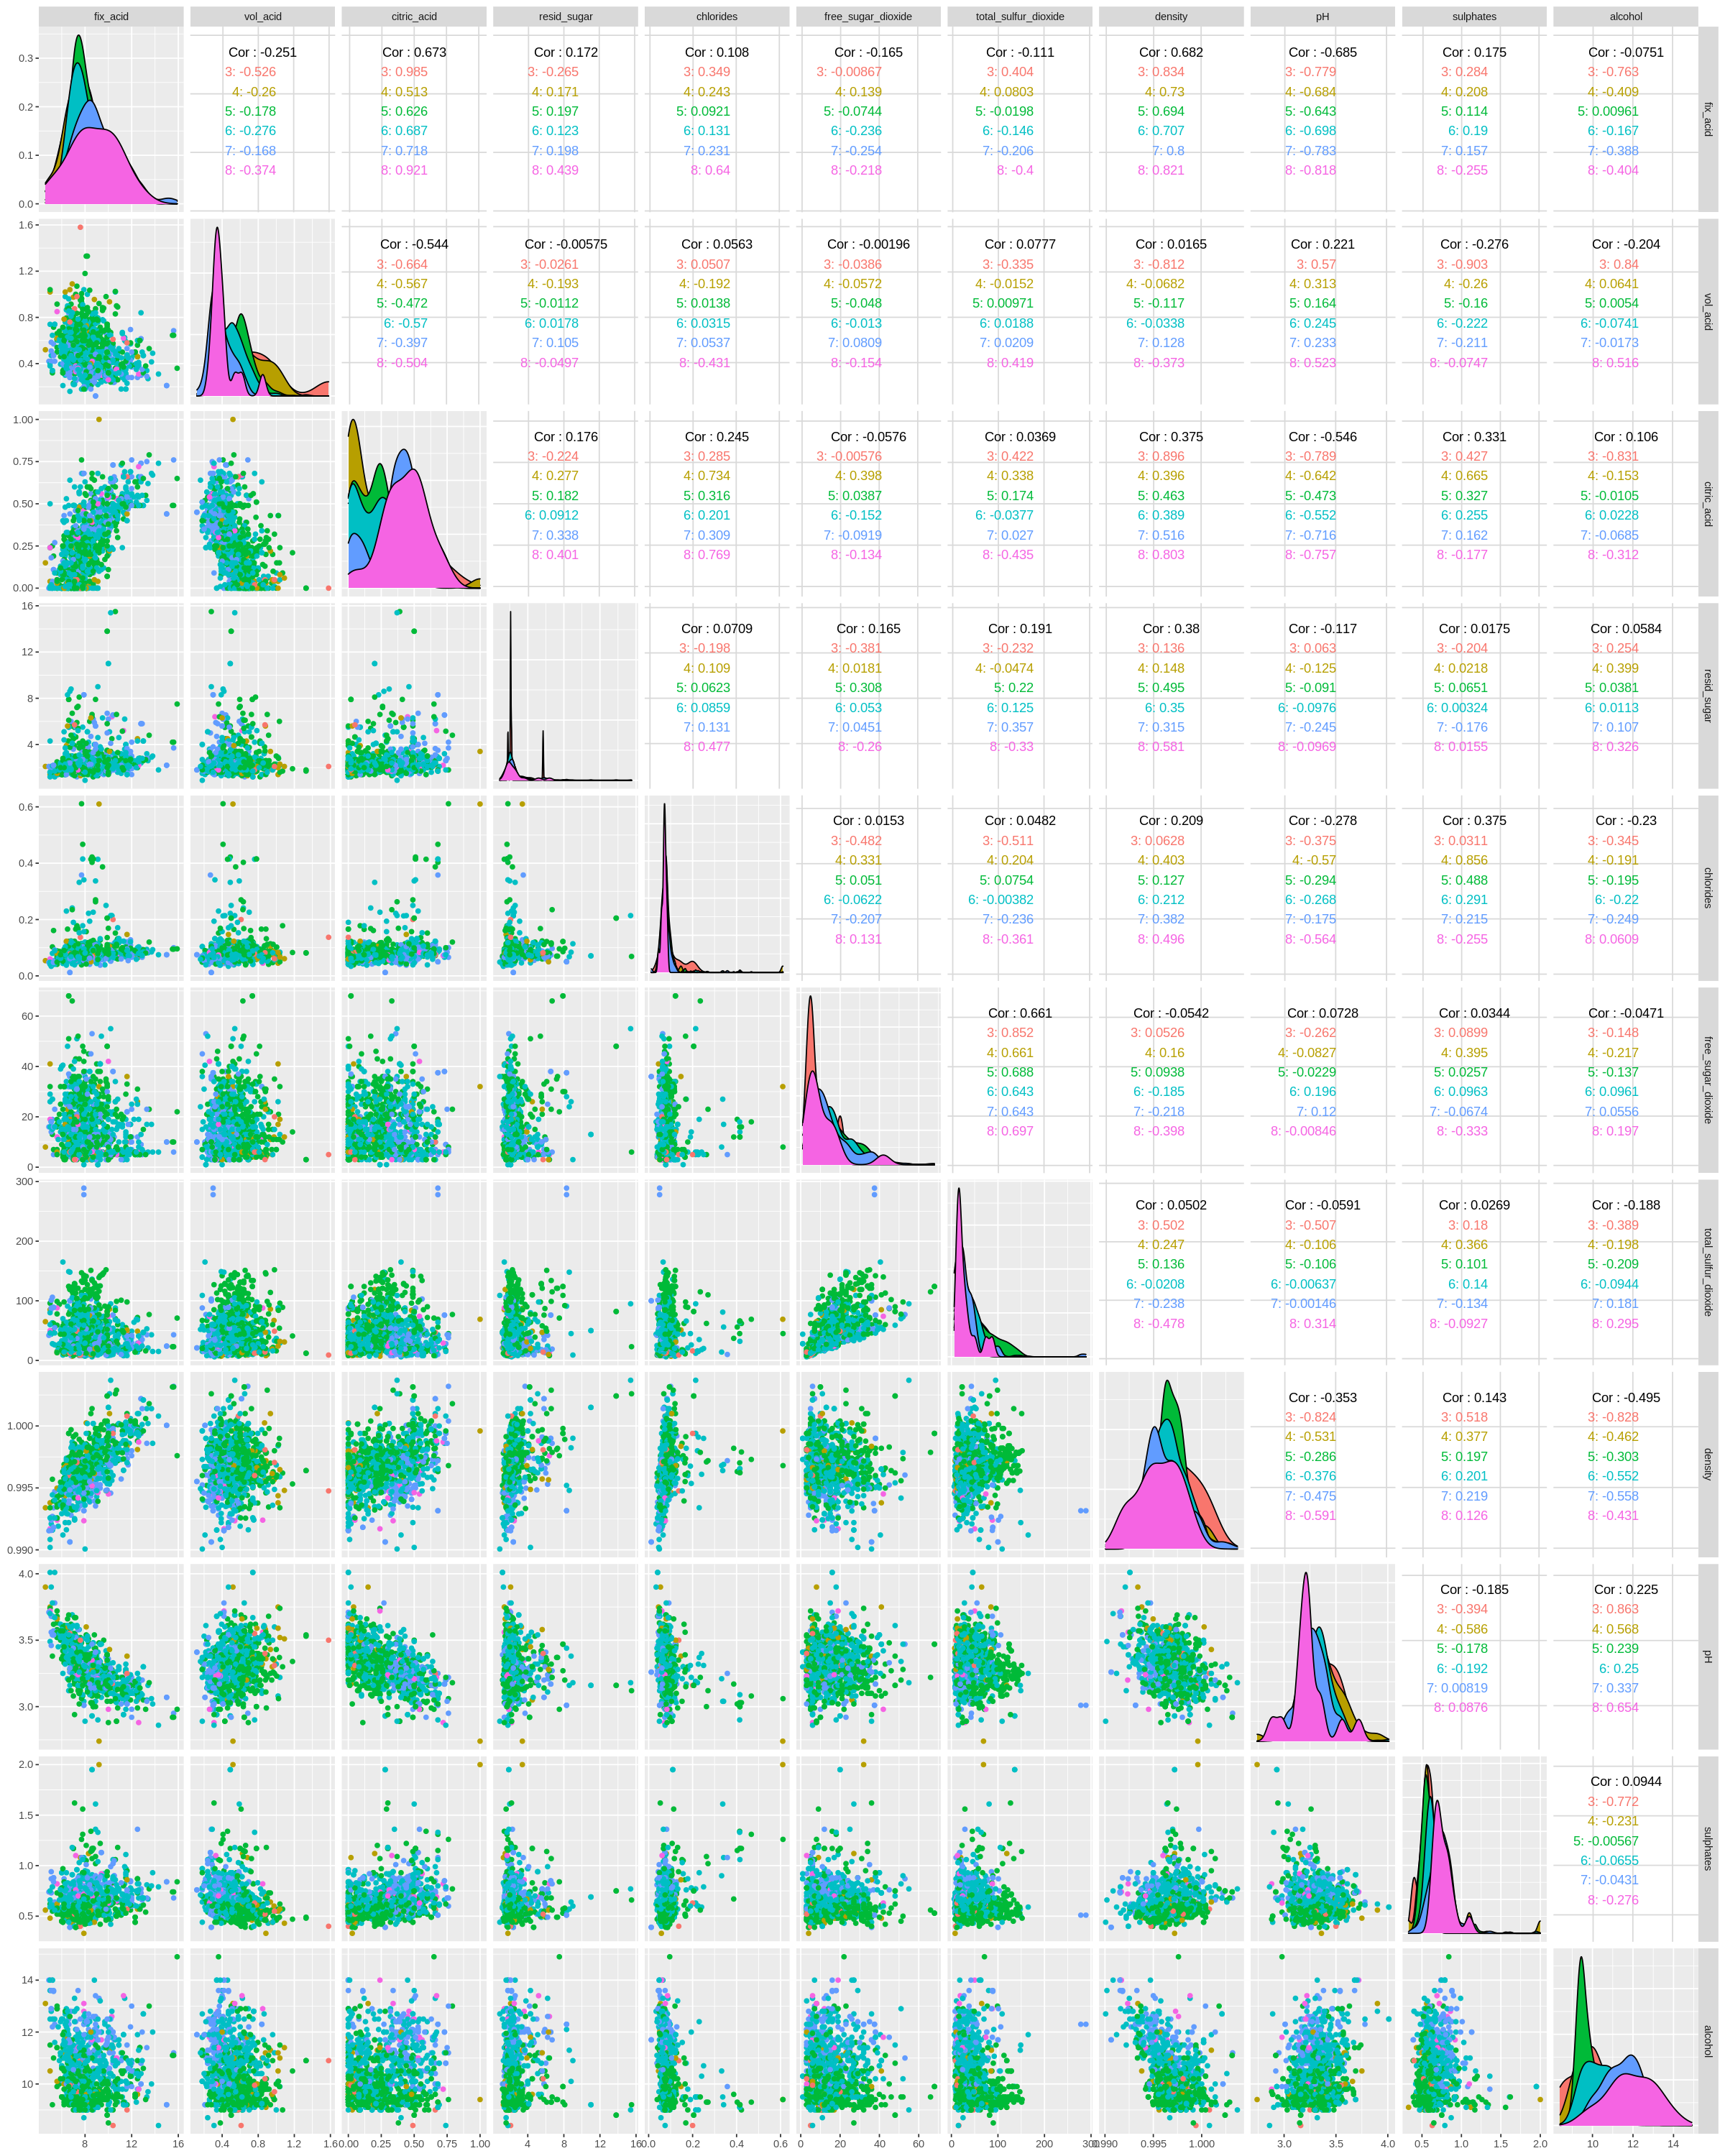

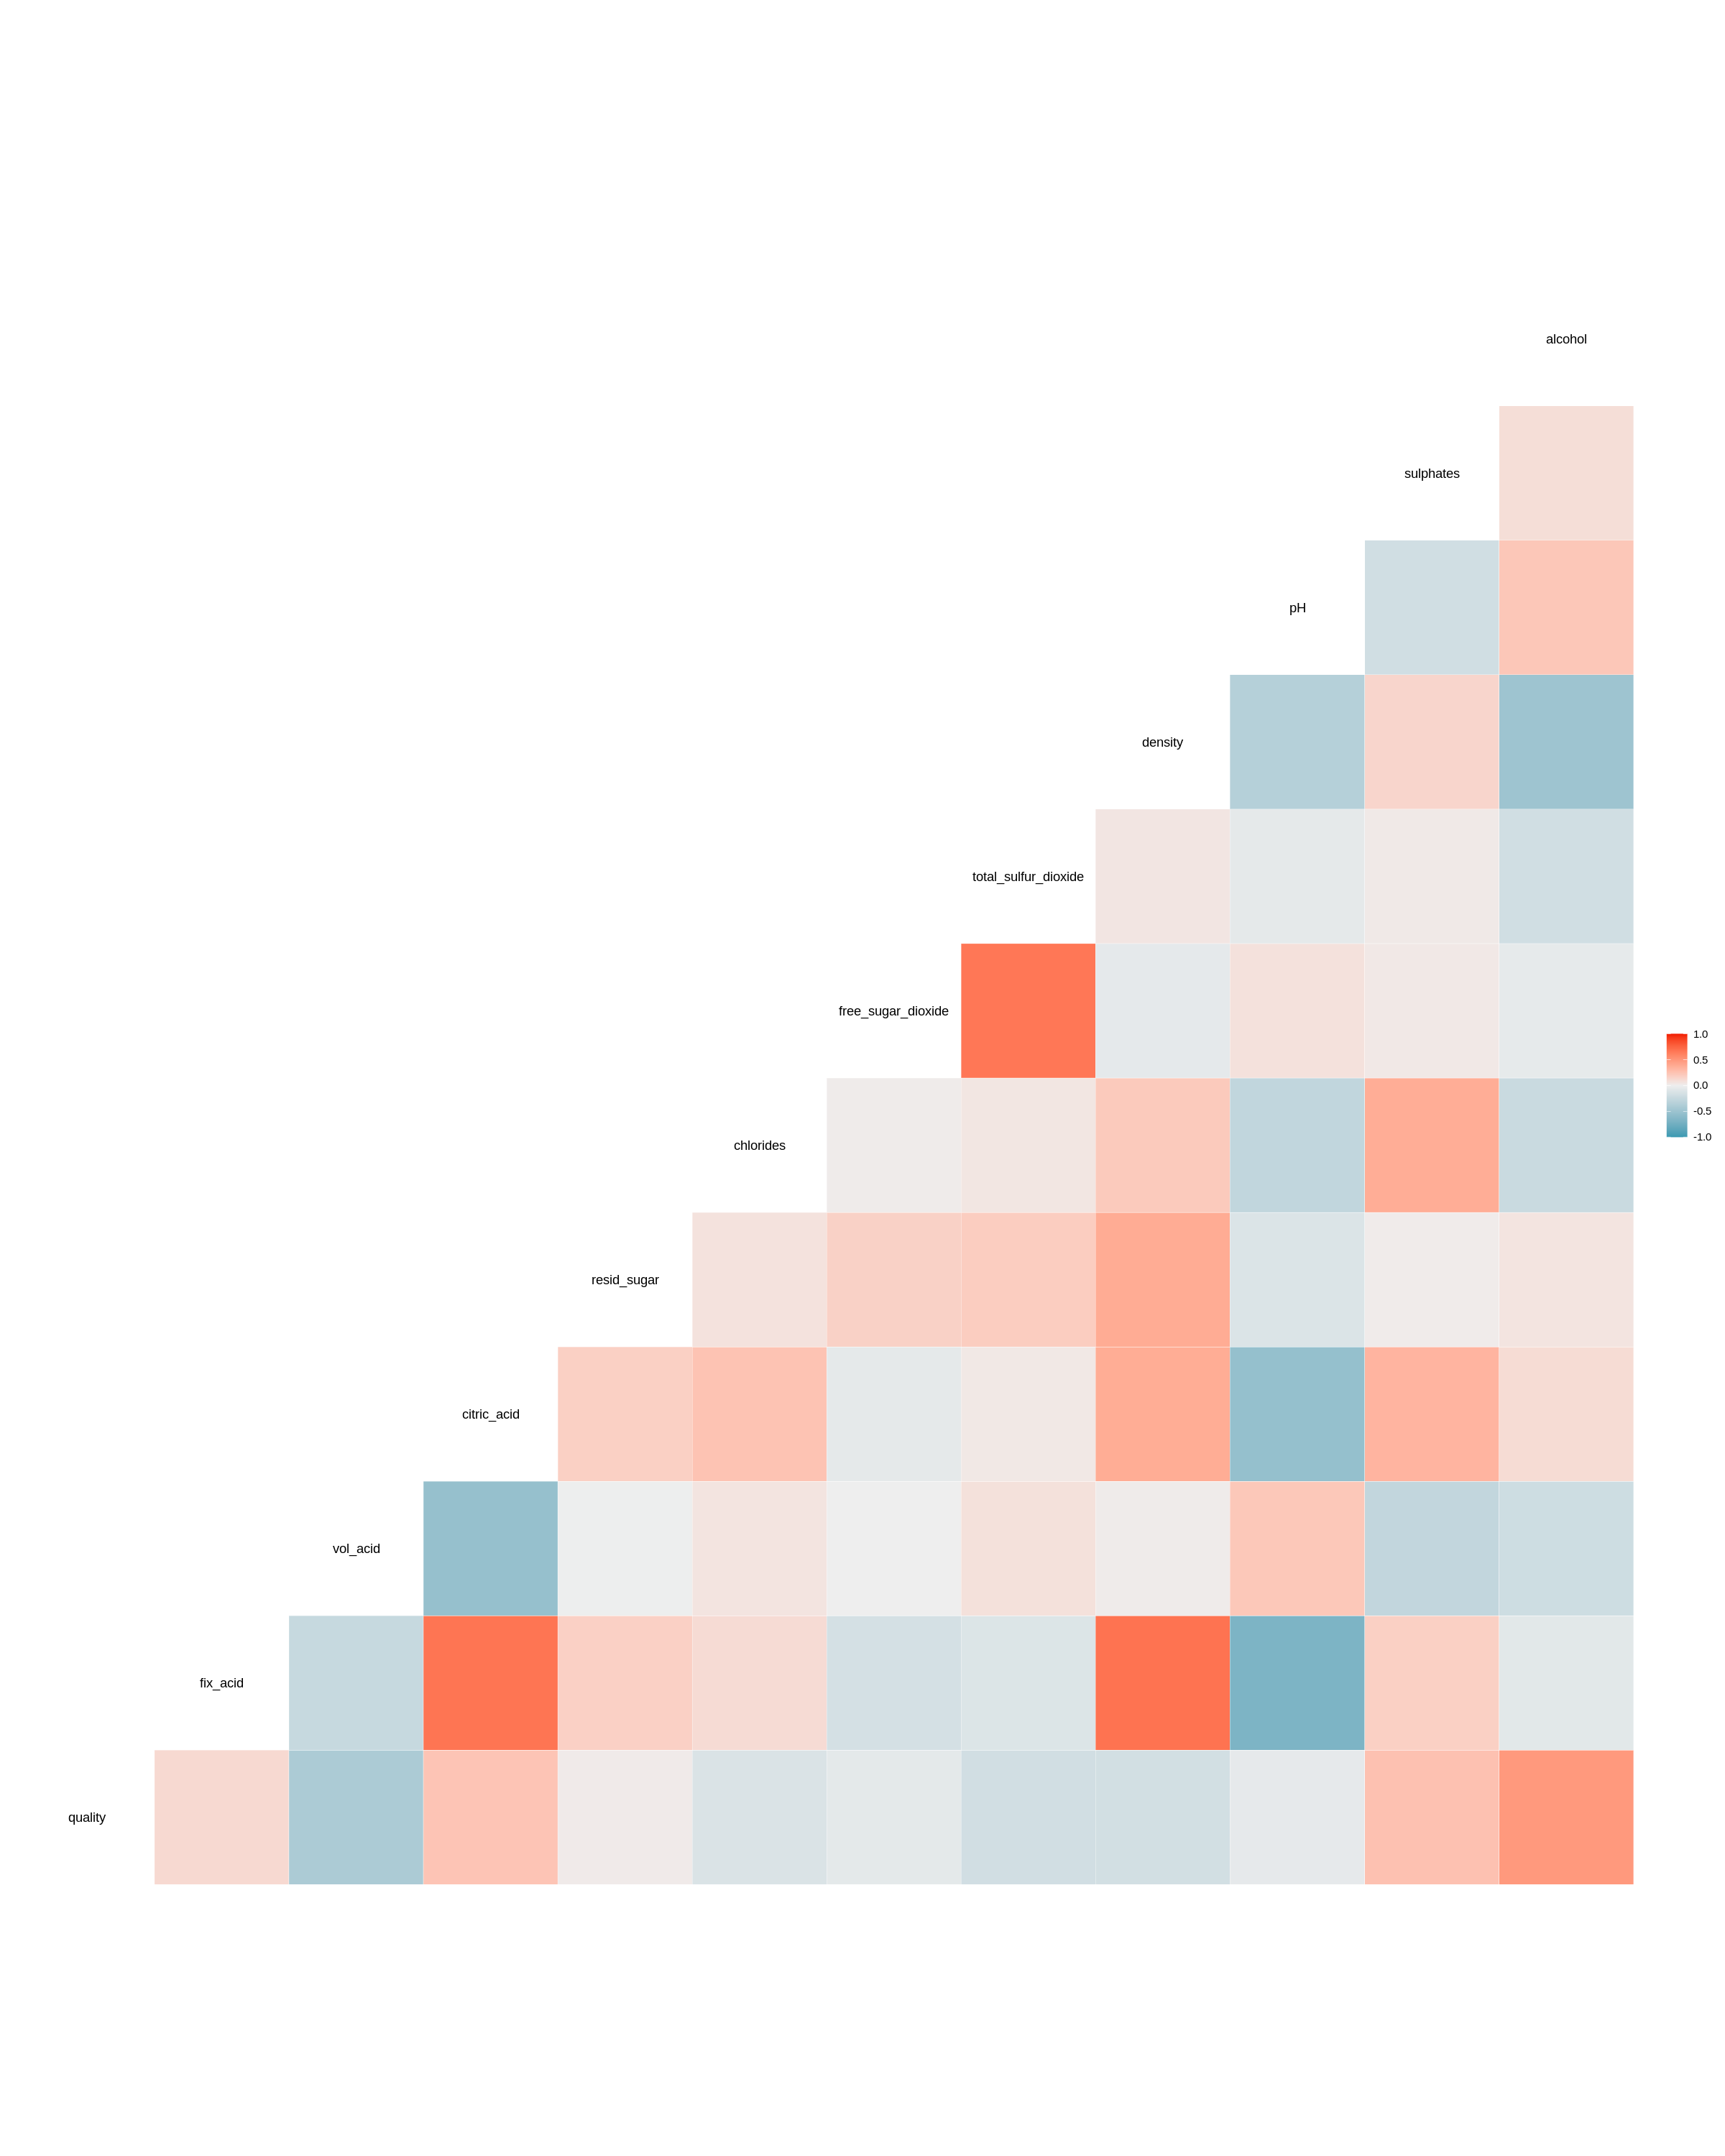

In [64]:
options(repr.plot.width = 20, repr.plot.height = 25)
wine_correlation <- wine%>%
                    ggpairs(ggplot2 ::aes(color = quality, bins = 15),columns = 2:12)
wine_correlation
corr <- wine %>%
        mutate(quality = as.numeric(quality))%>%
        ggcorr(method = c("everything", "pearson")) 
corr

The GGCORR graph shows that... 
 1. Citric Acid 
 2. Fixed Acid
 3. Total Sulfur Dioxide
 4. Free Sugar 

In [65]:
wine_summarize <- wine%>% 
               group_by(quality)%>%
               summarise(vol_acid_avg = mean(vol_acid), 
                         alcohol_avg = mean(alcohol),
                         total_sulfur_dioxide_avg = mean(total_sulfur_dioxide),
                         sulphates_avg = mean(sulphates), 
                         density_avg = mean(density), 
                         count = n())                       
#The quality distribution falls into the Gaussian normal distribution
#We see that median volatile acidity decreases as quality increases, while median alcohol content and total sulpher dioxide increase with quality
wine_summarize

`summarise()` ungrouping output (override with `.groups` argument)



quality,vol_acid_avg,alcohol_avg,total_sulfur_dioxide_avg,sulphates_avg,density_avg,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.8975000,9.691667,24.50000,0.5500000,0.9976817,6
4,0.7000000,10.260606,40.60606,0.6378788,0.9966694,33
5,0.5852795,9.902277,55.29917,0.6133747,0.9970727,483
6,0.5049567,10.655339,39.94156,0.6765368,0.9966095,462
7,0.3936713,11.482634,37.48951,0.7435664,0.9960708,143
8,0.4100000,11.937500,29.37500,0.7662500,0.9955531,16


Summarizing the dataset by Quality and finding the mean value is used to check the average differences in key variaables

`geom_smooth()` using formula 'y ~ x'



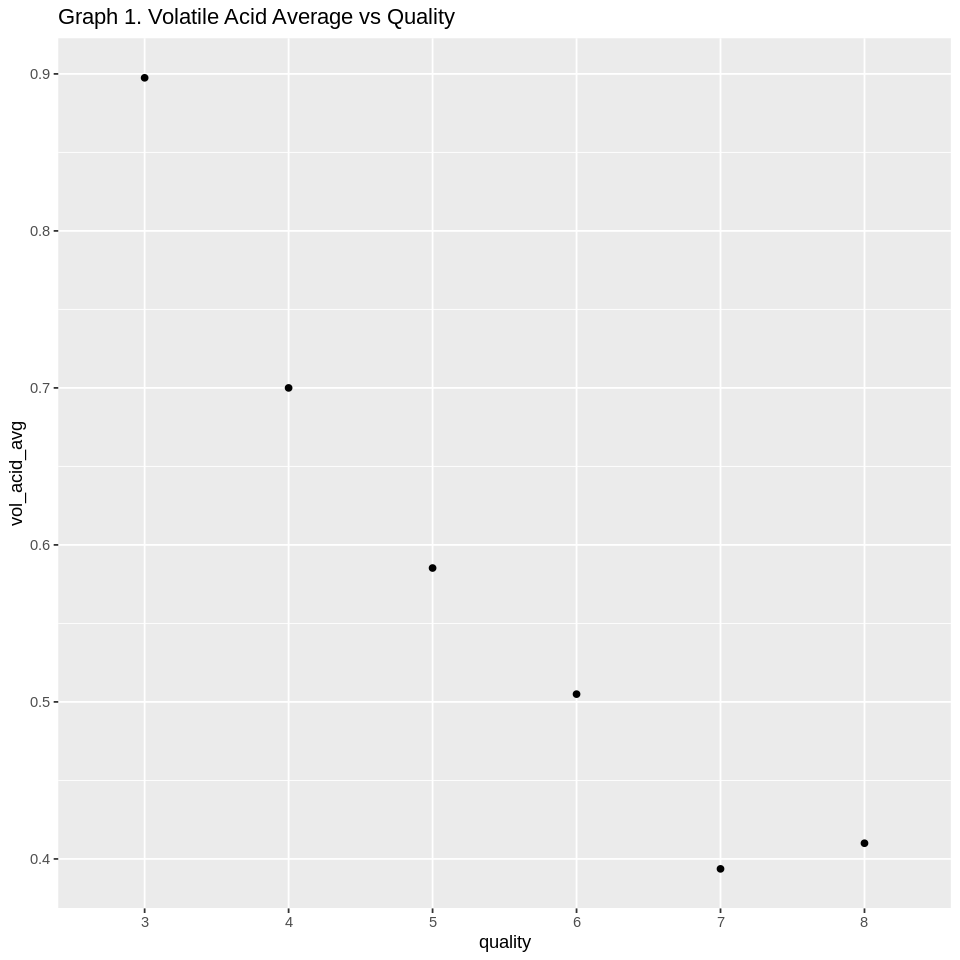

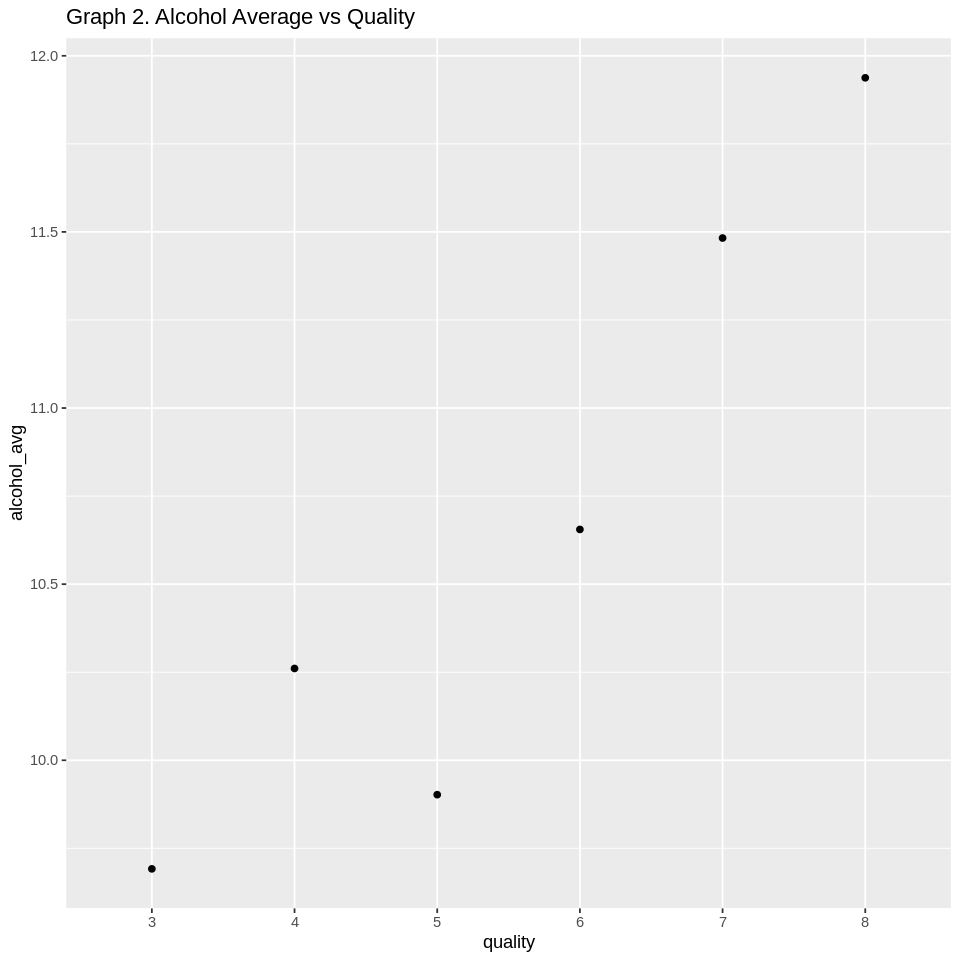

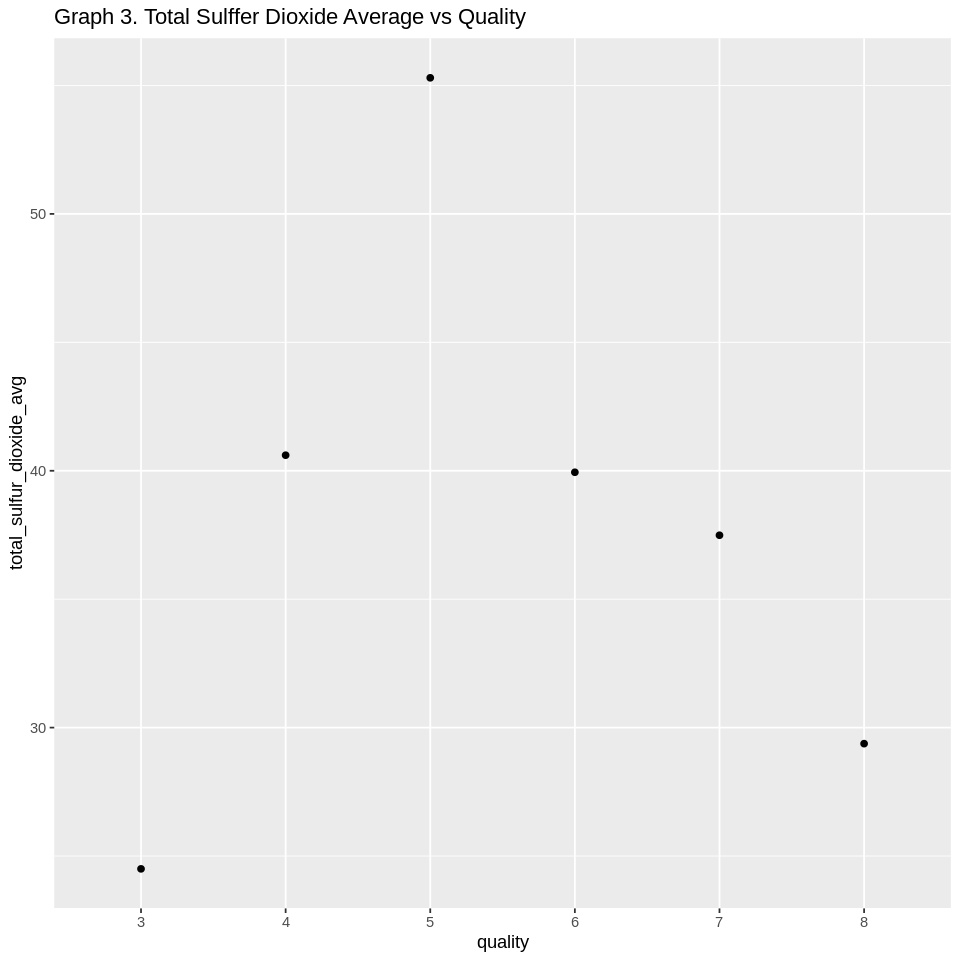

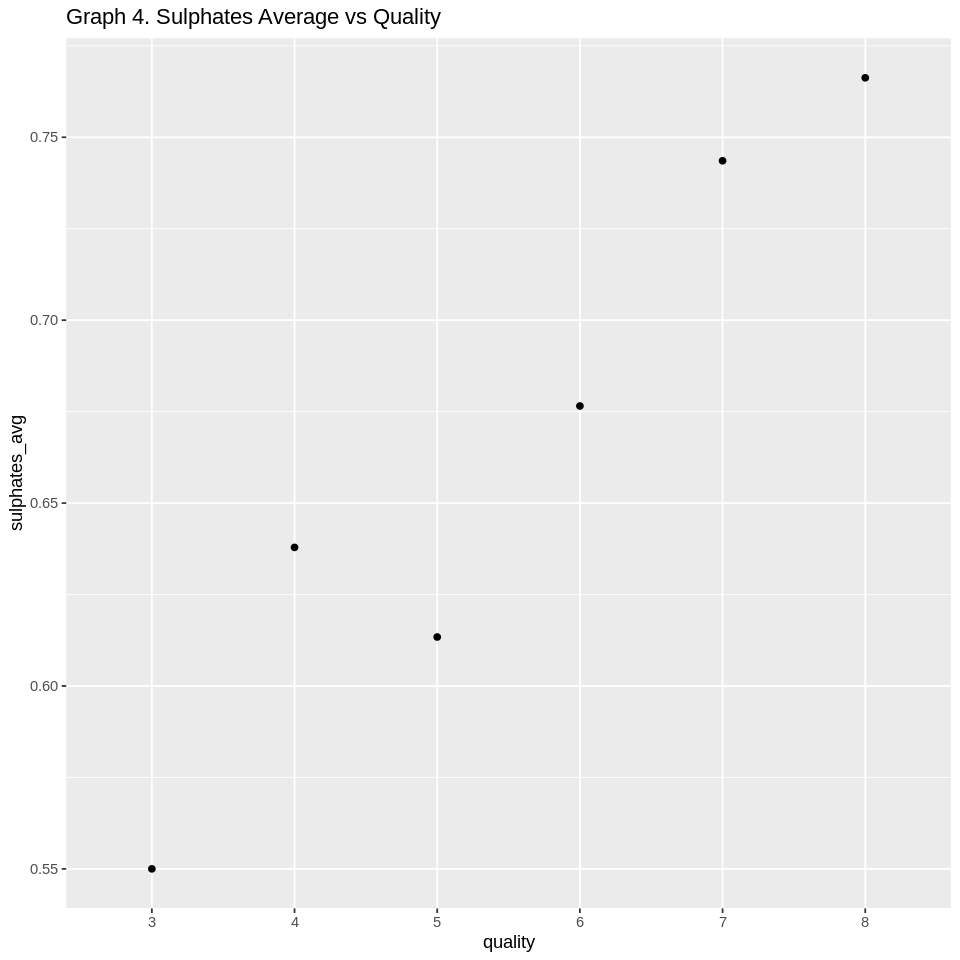

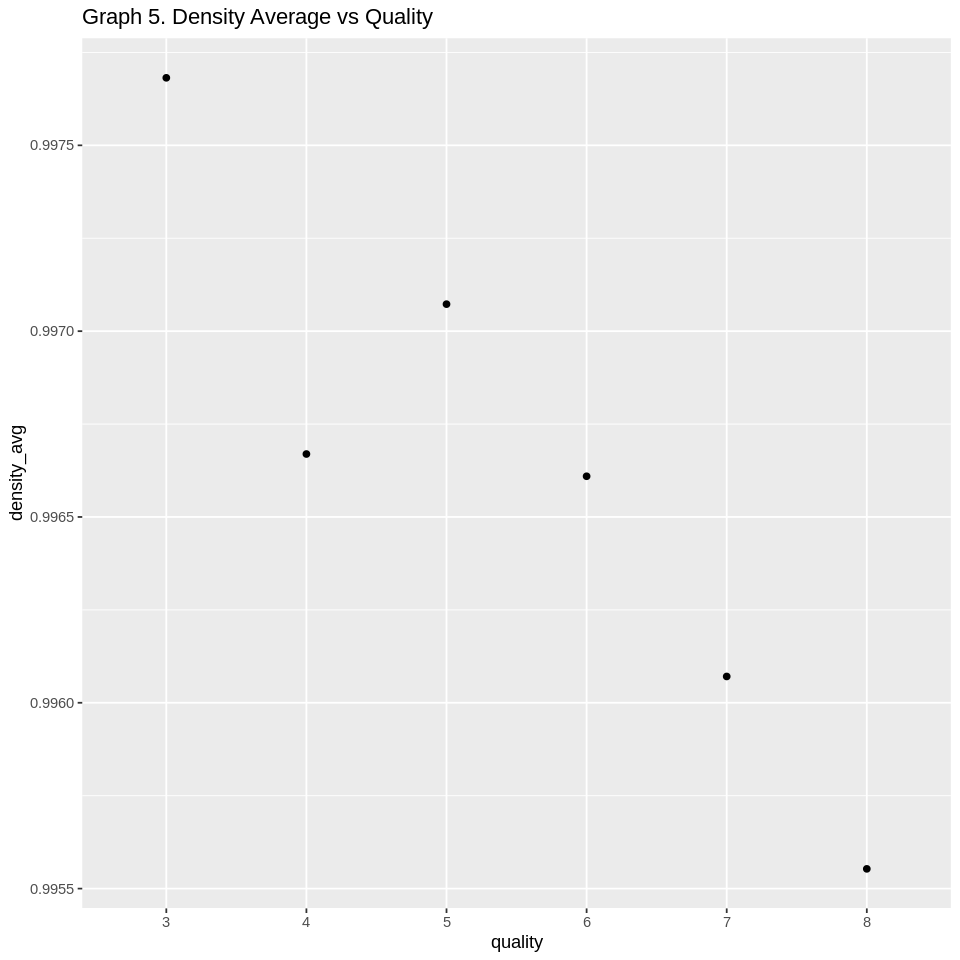

In [68]:
#visualization of the above table. All predictors appear to have some correlation to quality
options(repr.plot.width = 8, repr.plot.height = 8)
vol_acid_graph <- ggplot(wine_summarize, aes(x=quality, y=vol_acid_avg))+
    geom_point()+
    ggtitle("Graph 1. Volatile Acid Average vs Quality")+
    geom_smooth(method = 'lm', se = FALSE)
vol_acid_graph

alcohol_graph <- ggplot(wine_summarize, aes(x=quality, y=alcohol_avg))+
    geom_point()+
     ggtitle("Graph 2. Alcohol Average vs Quality")
alcohol_graph 

total_sulfer_dioxide_graph <- ggplot(wine_summarize, aes(x=quality, y=total_sulfur_dioxide_avg))+
    geom_point()+
 ggtitle("Graph 3. Total Sulffer Dioxide Average vs Quality")
total_sulfer_dioxide_graph

sulphates_graph <- ggplot(wine_summarize, aes(x=quality, y=sulphates_avg))+
    geom_point()+
     ggtitle("Graph 4. Sulphates Average vs Quality")
sulphates_graph

density_graph <- ggplot(wine_summarize, aes(x=quality, y=density_avg))+
    geom_point()+
     ggtitle("Graph 5. Density Average vs Quality")
density_graph


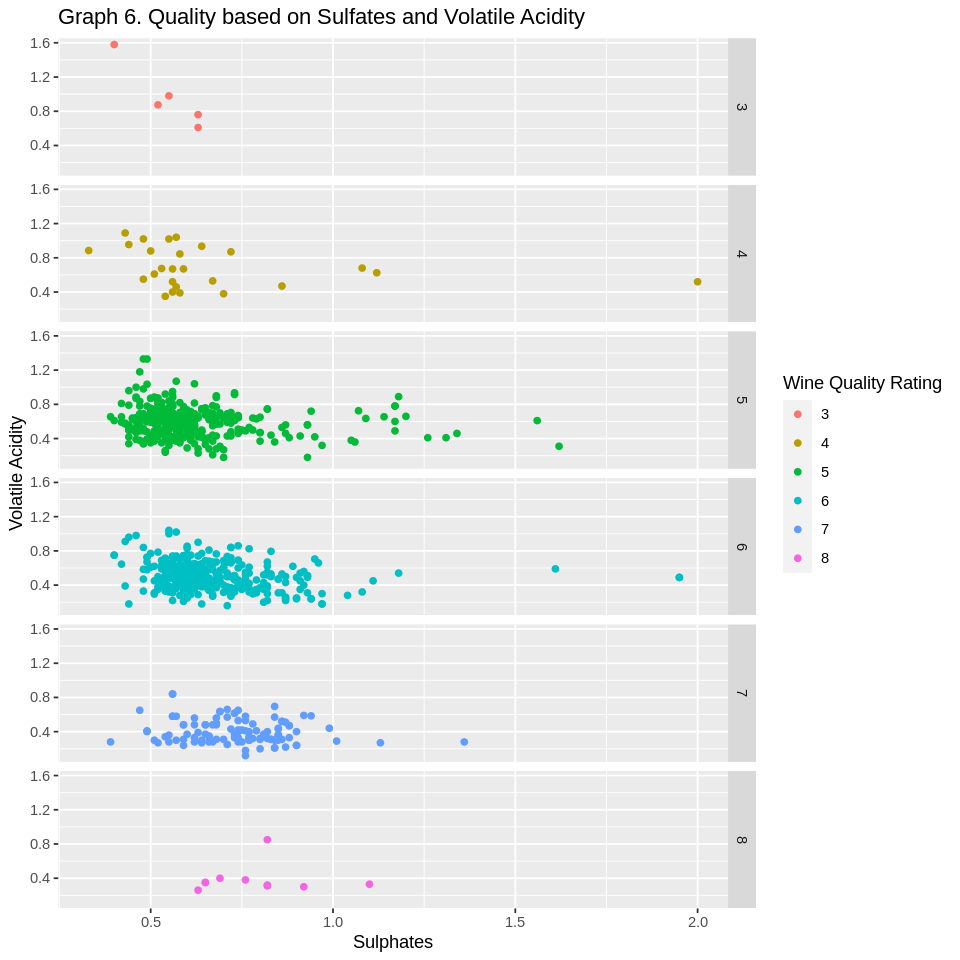

In [69]:
#Graph of volatile acid vs sulphates showing how these chemicals vary with the quality of the wine.
#Sulphates appear to increase in higher quality wine, while volatile acid appears to decrease with quality

data_visualization <- wine_train %>%
                     ggplot(aes(y = vol_acid, x = sulphates, color = quality))+
                     geom_point()+
                     labs(x="Sulphates", y="Volatile Acidity", color= "Wine Quality Rating")+
                     facet_grid(rows = vars(quality))+
                     ggtitle("Graph 6. Quality based on Sulfates and Volatile Acidity")

data_visualization

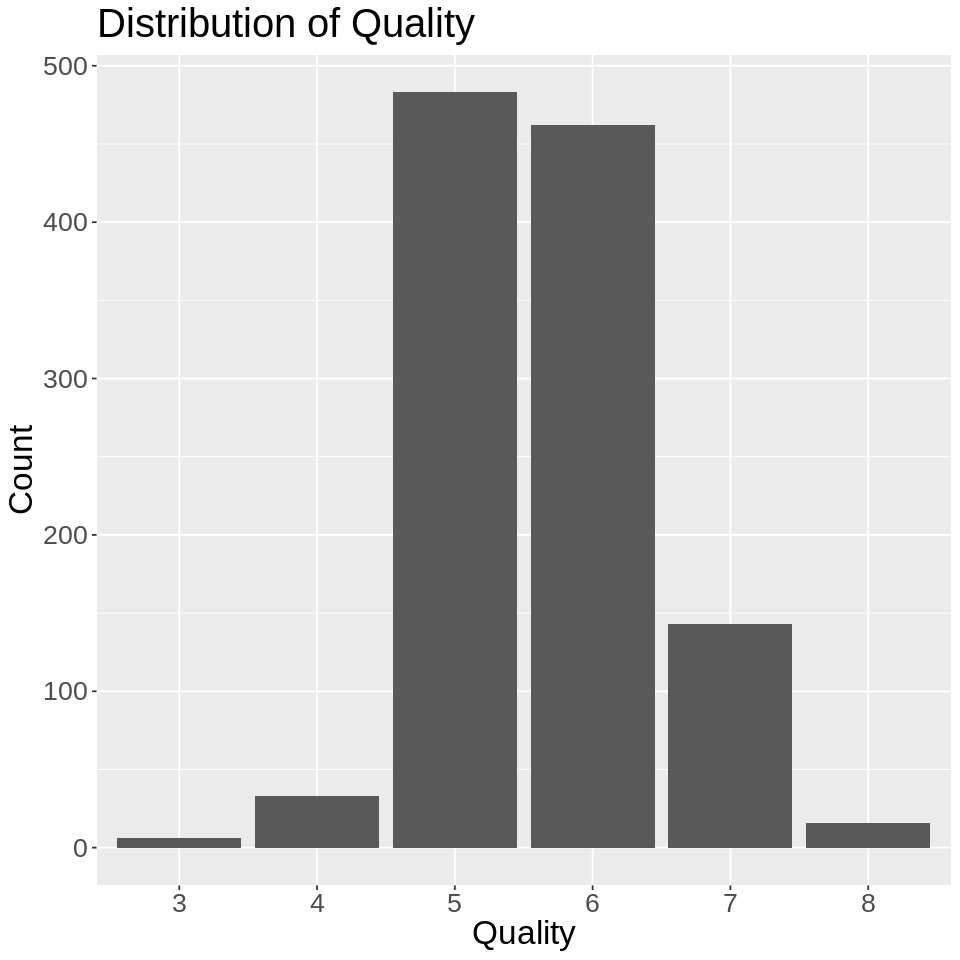

In [70]:
#This graph shows that the dataset includes many more medium quality wines than it does very good or very bad quality wines. 
#We may need to upsample to deal with this

bar_overall <- wine%>%
                ggplot(aes(x = quality))+
                geom_bar(stat= "count")+
                labs(x = 'Quality', title = "Distribution of Quality", y = "Count")+
                theme(text = element_text(size = 20))
bar_overall

In [71]:
#Create model
wine_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [72]:
#create recipe
wine_recipe <- recipe(quality ~ vol_acid + alcohol + total_sulfur_dioxide + sulphates + density, data = wine_train)%>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors()) 

wine_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [80]:
#5 fold cross validation
cross_val_data <- vfold_cv(wine_train, v=5, strata=quality)

#create grid specifications
sequence <- tibble(neighbors = seq(from=1, to=30, by=1))

In [81]:
#tune grid
determining_k <- workflow()%>%
    add_recipe(wine_recipe)%>%
    add_model(wine_model)%>%
    tune_grid(resamples=cross_val_data, grid=sequence)%>%
    collect_metrics()%>%
    filter(.metric=="accuracy")

determining_k


! Fold1: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5896139,5,0.01685980,Model01
2,accuracy,multiclass,0.5896139,5,0.01685980,Model02
3,accuracy,multiclass,0.5721372,5,0.01511983,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,multiclass,0.5967532,5,0.007560848,Model28
29,accuracy,multiclass,0.6026014,5,0.007938730,Model29
30,accuracy,multiclass,0.5979773,5,0.008795234,Model30


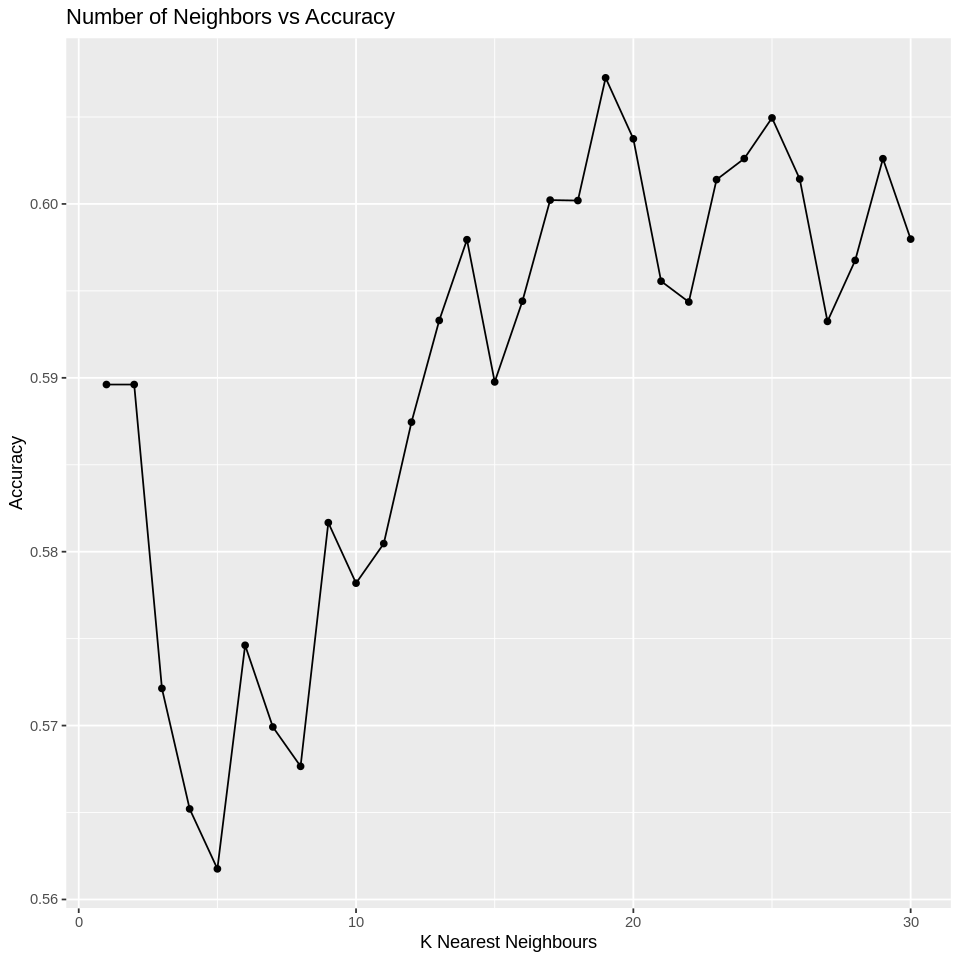

In [82]:
#graphs K vs accuracy to find best K
best_k <- ggplot(determining_k, aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    labs(x="K Nearest Neighbours", y="Accuracy")+
    ggtitle("Number of Neighbors vs Accuracy")
best_k
#best K is 19

In [83]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19)%>%
  set_engine("kknn")%>%
  set_mode("classification")

knn_fit <- workflow()%>%
  add_recipe(wine_recipe)%>%
  add_model(knn_spec)%>%
  fit(data = wine_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~19, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4032634
Best kernel: rectangular
Best k: 19

In [84]:
wine_test_predictions <- predict(knn_fit, wine_test)%>%
                         bind_cols(wine_test)

wine_test_predictions

.pred_class,quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sugar_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,5,7.6,0.390,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7
5,6,7.8,0.645,0.00,2.0,0.082,8,16,0.9964,3.38,0.59,9.8
5,5,8.3,0.655,0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,6,6.2,0.70,0.15,5.1,0.076,13,27,0.99622,3.54,0.60,11.9
5,5,6.2,0.46,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8
6,6,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0


In [85]:
wine_test_predictions%>%
  metrics(truth = quality, estimate = .pred_class)%>%
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6175439


In [86]:
confusion <- wine_test_predictions%>%
             conf_mat(truth = quality, estimate = .pred_class)

confusion

          Truth
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  1  6 82 32  2  0
         6  0  1 36 78 17  5
         7  0  0  0  8 16  1
         8  0  0  0  0  0  0


Reference 


Nimit Dhalia “The Effect of Physicochemical on The Wine Quality”
https://rpubs.com/nimit/Report

Dataset 
Wine Quality Dataset 
M Yasser H 
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


Nuriel Shalom Mor - Wine Quality and Type Prediction
Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers